In [2]:
import pandas as pd

# Specify the filename of the uploaded dataset (e.g., 'books.csv')
uploaded_file = 'books.csv'  # Update with the actual filename

# Load the dataset using the filename of the uploaded file
df = pd.read_csv(uploaded_file)

# Display the first few rows of the dataset to verify
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [5]:
print(df.columns)

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')


In [ ]:
harry_potter_df = books_df[books_df['book_series'].str.contains('Harry Potter')]


In [9]:
# Load the dataset into books_df
books_df = pd.read_csv('books.csv')
# Remove unnecessary columns
columns_to_drop = ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
                   'isbn', 'isbn13', 'image_url', 'small_image_url']
books_df = books_df.drop(columns=columns_to_drop)

# Check for missing values
missing_values = books_df.isnull().sum()
print(missing_values)
# Handle missing values if any


books_count                    0
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
dtype: int64


In [8]:
# Filter the dataset to include only the Harry Potter books
harry_potter_df = books_df[books_df['title'].str.contains('Harry Potter')]

# Find the most selling books within the Harry Potter series
most_selling_books = harry_potter_df.groupby('title')['ratings_count'].sum().sort_values(ascending=False)
print("Most selling Harry Potter books:")
print(most_selling_books.head())

# Calculate the average rating of the Harry Potter books
average_rating = harry_potter_df['average_rating'].mean()
print("Average rating of Harry Potter books:", average_rating)

Most selling Harry Potter books:
title
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       4602479
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    1832823
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     1779331
Harry Potter and the Goblet of Fire (Harry Potter, #4)         1753043
Harry Potter and the Deathly Hallows (Harry Potter, #7)        1746574
Name: ratings_count, dtype: int64
Average rating of Harry Potter books: 4.482727272727273


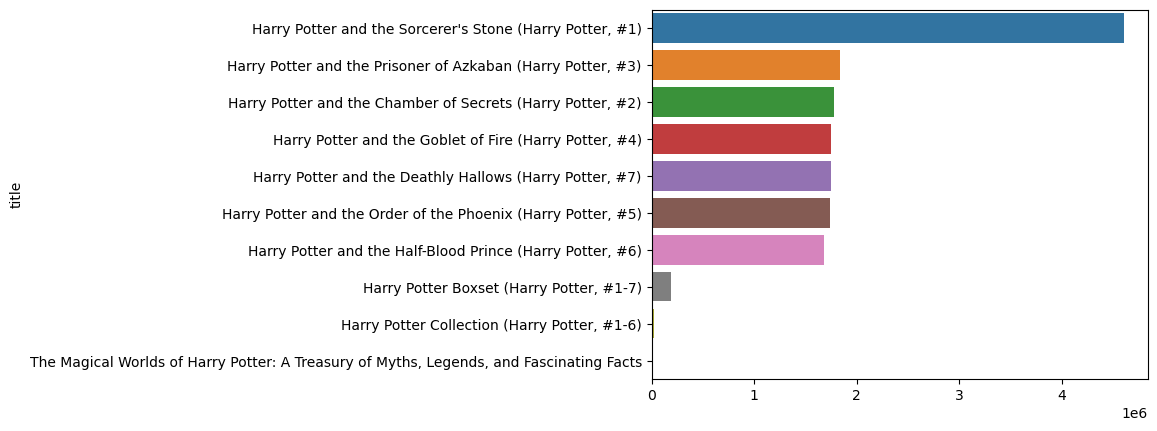

<Figure size 1200x600 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by book title and sum the sales
most_selling_books = harry_potter_df.groupby('title')['ratings_count'].sum().sort_values(ascending=False).head(10)

# Plotting
sns.barplot(x=most_selling_books.values, y=most_selling_books.index, hue=most_selling_books.index, legend=False)
plt.figure(figsize=(12, 6))
plt.show()



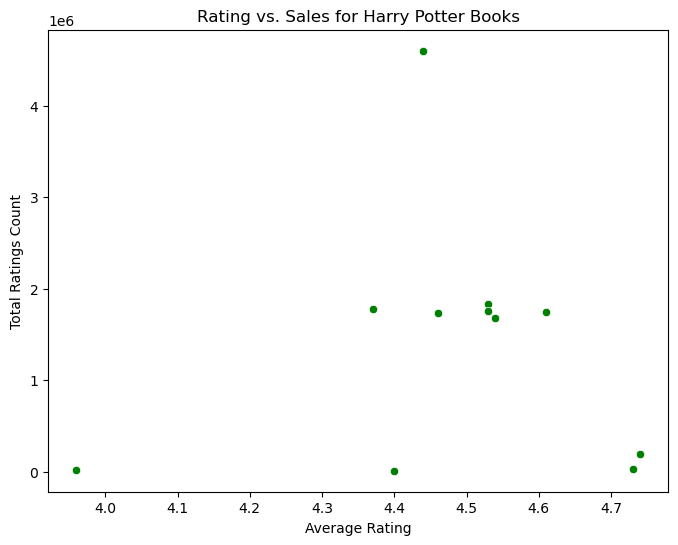

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_rating', y='ratings_count', data=harry_potter_df, color='green')
plt.title('Rating vs. Sales for Harry Potter Books')
plt.xlabel('Average Rating')
plt.ylabel('Total Ratings Count')
plt.savefig('rating_vs_sales.png')  # Save the plot as a PNG file
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(harry_potter_df['average_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings for Harry Potter Books')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.savefig('rating_distribution.png')  # Save the plot as a PNG file
plt.show()
